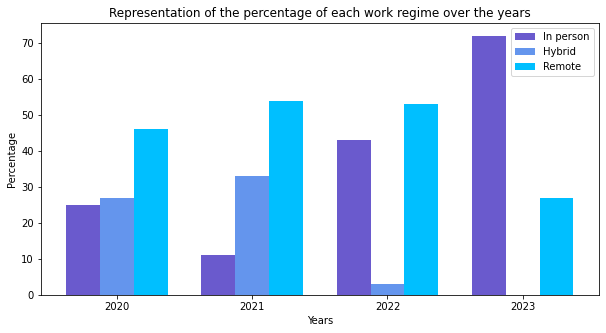

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# O objetivo do gráfico é mostrar a porcentagem do total que cada regime de trabalho representa ao longo dos anos, para poder analisar por exemplo o impacto da pandemia nesse aspecto no ano de 2021 e como o mercado vem reagindo pós-pandemia, para fazer essa analise achamos correto desconsiderar registros em que o país da empresa e o país de residencia do funcionario são diferentes pois obrigatoriamente o trabalho é remoto e desconsiderar tambem registros que não representam relações de trabalho em tempo integral. O layout pensando para o gráfico e o layout de barras agrupadas com cada barra representando a porcentagem de um dos regimes de trabalho representados no dataset, com barras distibuidas ao longo dos anos de forma crescente.

# Função para calcular porcentagem
def calculate_percentage(total_value, value_to_calculate_percentage):
  percentage = value_to_calculate_percentage * 100 // total_value

  return percentage

# Importação do dataset
raw_dataset = pd.read_csv('./salaries.csv')

# Variaveis para auxiliar no refinamento e limpeza do dataset
work_year = []
remote_ratio = []

# Loop que percorre o dataset e preenche as variaveis auxiliares com valores que vão ser uteis na geração do gráfico
for index in raw_dataset.index:
  row_information = raw_dataset.iloc[index]

  row_is_elegible = True if row_information.employment_type == 'FT' and row_information.employee_residence == row_information.company_location else False

  if(row_is_elegible):
    work_year.append(row_information.work_year)
    remote_ratio.append(row_information.remote_ratio)

# Geração de um novo dataset, refinado e limpo contendo apenas informações que vão ser uteis para geração do grafico
data = {
    'work_year': work_year,
    'remote_ratio': remote_ratio,
}

refined_dataset = pd.DataFrame(data, columns=['work_year', 'remote_ratio'])

# Variaveis para auxiliar na transformação dos dados para que possam ser exibidos no grafico
counters_for_graph = {}
years = sorted(set(work_year))

# Loop que inicializa os contadores concatenando o ano em questão ao regime de trabalho
for year in years:
  counters_for_graph[str(year) + '_in_person'] = 0
  counters_for_graph[str(year) + '_hybrid'] = 0
  counters_for_graph[str(year) + '_remote'] = 0

# Loop que percorre o dataset e incrementa os contadores de acordo com o ano do registro e o regime de trabalho 
for index in refined_dataset.index:
  row_information = raw_dataset.iloc[index]

  if(row_information.remote_ratio == 0):
    counters_for_graph[str(row_information.work_year) + '_in_person'] += 1

  if(row_information.remote_ratio == 50):
    counters_for_graph[str(row_information.work_year) + '_hybrid'] += 1

  if(row_information.remote_ratio == 100):
    counters_for_graph[str(row_information.work_year) + '_remote'] += 1

# Variavel para auxliar na montagem das barras do gráfico
graph_bars = {
    'in_person': [],
    'hybrid': [],
    'remote': [],
}

# Loop para preencher as barras do grafico com a porcentagem que cada regime de trabalho ocupa do total ao longo dos anos de acordo com o dataset
for year in years:
  total_hybrid = counters_for_graph[str(year) + '_hybrid']
  total_remote = counters_for_graph[str(year) + '_remote']
  total_in_person = counters_for_graph[str(year) + '_in_person']
  total_year_sample = total_hybrid + total_remote + total_in_person

  graph_bars['in_person'].append(calculate_percentage(total_year_sample, total_in_person))
  graph_bars['hybrid'].append(calculate_percentage(total_year_sample, total_hybrid))
  graph_bars['remote'].append(calculate_percentage(total_year_sample, total_remote))

# Definindo largura das barras do gráfico
bar_width = 0.25

# Aumentando o gráfico
plt.figure(figsize=(10,5))

# Definindo a posição das barras do gráfico
in_person_bars_position = np.arange(len(years))
hybrid_bars_position = [in_person_bar + bar_width for in_person_bar in in_person_bars_position]
remote_bars_position = [hybrid_bar + bar_width for hybrid_bar in hybrid_bars_position]

# Criando as barras do gráfico
plt.bar(in_person_bars_position, graph_bars['in_person'], color='#6A5ACD', width=bar_width, label='In person')
plt.bar(hybrid_bars_position, graph_bars['hybrid'], color='#6495ED', width=bar_width, label='Hybrid')
plt.bar(remote_bars_position, graph_bars['remote'], color='#00BFFF', width=bar_width, label='Remote')

# Adicionando legendas do gráfico
plt.xlabel('Years')
plt.xticks([marker + bar_width for marker in range(len(years))], [str(year) for year in years])
plt.ylabel('Percentage')
plt.title('Representation of the percentage of each work regime over the years')

# Criando legenda e exibindo o gráfico
plt.legend()
plt.show()

